# Pymaceuticals Inc.
---

### Analysis
- Pymaceuticals Inc., is pharmaceutical company that perfom some  anti-cancer medication tests. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

- This analysis is based on the complete data from their most recent animal study.
- In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens.
- Over the course of 45 days, tumor development was observed and measured.
- The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
- The task of this python project is to generate all of the tables and figures needed for the technical report of the clinical study.
- Final analysis, deductions and conclusions can be found at the end of this notebook.

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(mouse_metadata, study_results,how='right')

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                               'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [37]:
# Checking the number of mice.
mice_number=combined_data["Mouse ID"].value_counts()
mice_number=len(mice_number)
mice_number

249

In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df = combined_data.set_index('Mouse ID')
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [78]:
# Checking the number of mice in the clean DataFrame.
number_cleaned_mice=cleaned_df["Mouse ID"].value_counts()
number_cleaned_mice=len(number_cleaned_mice)
number_cleaned_mice
clean_df2 = cleaned_df.reset_index()
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics
- This sub-section:

- Creates a DataFrame of summary statistics including:
- A row for each drug regimen and
- A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.of the tumor volume for each regimen
tumor_mean=cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median=cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_variance=cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std=cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem=cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
 
# Assemble the resulting series into a single summary DataFrame.
static_summary_df=pd.DataFrame({"Mean Tumor Volume":tumor_mean, 
                                    "Median Tumor Volume":tumor_median, 
                                    "Tumor Volume Variance":tumor_variance, 
                                    "Tumor Volume Std. Dev.":tumor_std, 
                                    "Tumor Volume Std. Err.": tumor_sem})
static_summary_df

/var/folders/y8/wd2vns792mvg7dgtj75yh5jr0000gn/T/ipykernel_986/993589242.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean=cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
/var/folders/y8/wd2vns792mvg7dgtj75yh5jr0000gn/T/ipykernel_986/993589242.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median=cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
/var/folders/y8/wd2vns792mvg7dgtj75yh5jr0000gn/T/ipykernel_986/993589242.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will de

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts
- This sub-section:

- Generates two bar charts which are identical and show the total number of time points for all mice tested for each drug regimen throughout the study.

- 1st bar chart: the Pandas DataFrame.plot() method.
- 2nd bar chart: Matplotlib's pyplot methods.
- Generates two pie charts which are identical and show the distribution of female versus male mice in the study.

- 1st pie chart: Pandas DataFrame.plot() method.
- 2nd pie chart: Matplotlib's pyplot methods.

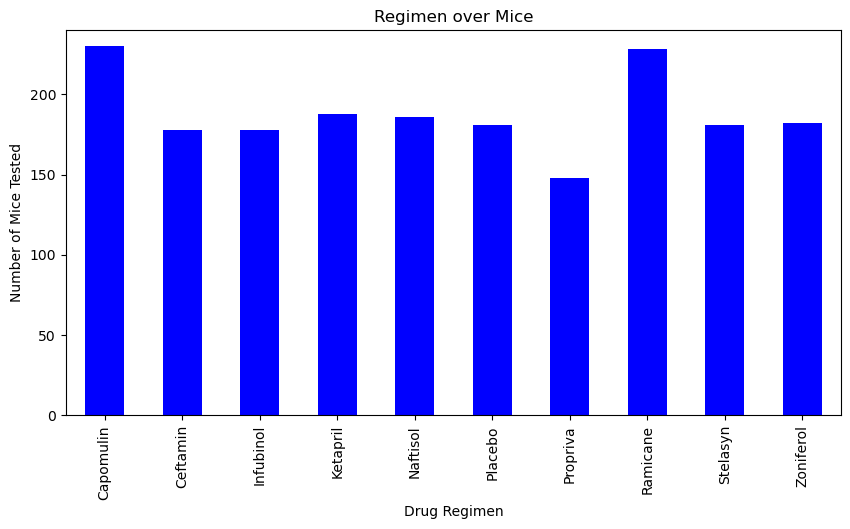

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
y_values =cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()
y_values.plot.bar(y_values, color="b", figsize=(10,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Regimen over Mice")

plt.ylim(0, max(y_values)+10)
plt.show()

<module 'matplotlib.pyplot' from '/Users/toobaahmad/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

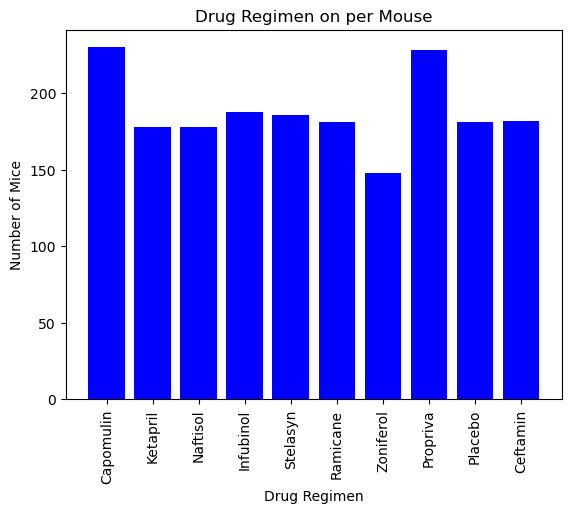

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_names = cleaned_df['Drug Regimen'].unique()
x_axis = drug_names
y_axis = cleaned_df.groupby(['Drug Regimen']).count()['Mouse ID']
tick_locations = x_axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Drug Regimen on per Mouse')
plt.bar(x_axis, y_axis, color="b")
plt.xticks(tick_locations, rotation= 90)
plt


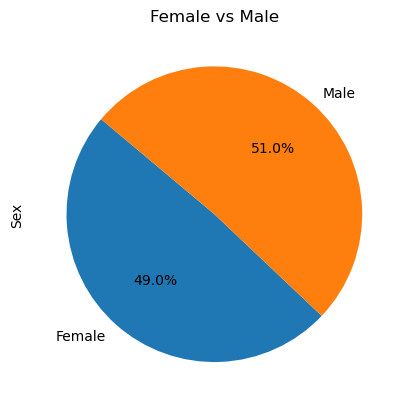

Sex
Female    922
Male      958
Name: Sex, dtype: int64

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender=cleaned_df.groupby(['Sex'])['Sex'].count()
gender.plot.pie(autopct="%1.1f%%", startangle=140)
plt.title("Female vs Male")
plt.show()
gender

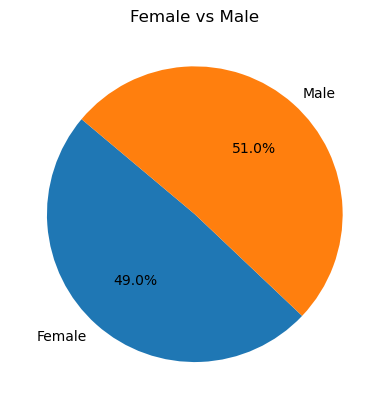

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes=[922, 958]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Female vs Male")
plt.show()

## Quartiles, Outliers and Boxplots
- This Sub-Section:

- Calculates the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
- Then, calculates the quartiles and IQR, and determines if there are any potential outliers across all four treatment regimens by using the following substeps:
- Creating a grouped DataFrame that shows the last (greatest) time point for each mouse.
- Merging this grouped DataFrame with the original cleaned DataFrame.
- Creating a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
- Looping through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.
- Appending the resulting final tumor volumes for each drug to the empty list.
- Determining outliers by using the upper and lower bounds, and then printing the results.
- Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_df = pd.DataFrame(final_tumor)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(cleaned_df, final_tumor_df, on=('Mouse ID', 'Timepoint'), how='right')
final_df.head()
# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for regimens in range(len(treatment_regimens)):
    time_point_df = final_df[final_df['Drug Regimen'] == treatment_regimens[regimens]]
    print(time_point_df)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
19      b128         45           38.982878                 2    Capomulin   
24      b742         45           38.939633                 0    Capomulin   
61      f966         20           30.485985                 0    Capomulin   
64      g288         45           37.074024                 1    Capomulin   
66      g316         45           40.159220                 2    Capomulin   
80      i557         45           47.685963                 1    Capomulin   
83      i738         45           37.311846                 2    Capomulin   
85      j119         45           38.125164                 1    Capomulin   
87      j246         35           38.753265                 1    Capomulin   
108     l509         45           41.483008                 3    Capomulin   
115     l897         45           38.846876                 1    Capomulin   
121     m601         45           28.430964                 1   

In [65]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
#tumor_volume_data = {'Capomulin': [],
                    # 'Ramicane': [],
                     #'Infubinol': [], 
                     #'Ceftamin': []}

#for regimens in treatment_regimens:
    #loop through all the highes timepoint
    #for x in final_df.index:
        
        #if final_df.iloc[x]['Drug Regimen']==regimens:
        #apending the tumor volume in hte list
           #tumor_volume_data[regimens].append(final_df['Tumor Volume (mm3)'])
        #creating a data frame to put all volumes the list in it
#tumor_volume_df=pd.DataFrame(tumor_volume_data)

#drug_volume_df_max =tumor_volume_df .max()
#drug_volume_df_min = tumor_volume_df.min()

#tumor_volume_df

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_regimens[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_regimens[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_regimens[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
#created a data frame with the tumor data of the drugs listed.
drug_df = pd.DataFrame({"Capomulin": tumor_cap,treatment_regimens[1]: tumor_ram,treatment_regimens[2]: tumor_inf,treatment_regimens[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()

drug_df_min = drug_df.min()
#drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [56]:
quart_cap = drug_df[treatment_regimens[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatment_regimens[0]].max()
min_cap = drug_df[treatment_regimens[0]].min()

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatment_regimens[1]].max()
min_ram = drug_df[treatment_regimens[1]].min()

quart_inf = drug_df[treatment_regimens[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatment_regimens[2]].max()
min_inf = drug_df[treatment_regimens[2]].min()

quart_cef = drug_df[treatment_regimens[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatment_regimens[3]].max()
min_cef = drug_df[treatment_regimens[3]].min()

outliers = pd.DataFrame({'Drug': treatment_regimens,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()
    

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


In [64]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes

total_tumor_vol = []
for regimens in treatment_regimens:
    #loop to get the IQR and potential outliers
    #adding the subset
    
    
# subset defining the row to set quartile on the volume
    quartiles = subset['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # bounds for outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
     # Determine outliers using upper and lower bounds and getting them
    outliers = pd.DataFrame({'Drug': [regimens],
                             'Lower Quartile':[lowerq],
                             'Upper Quartile':[upperq],
                             'IQR':[iqr],
                             'Upper Bound':[lower_bound],
                             'Lower Bound':[upper_bound],
                        })
    print(outliers)
    outliers_box_plot = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    outliers_group = outliers.groupby('Drug')
    outliers_group.sum()


        Drug  Lower Quartile  Upper Quartile        IQR  Upper Bound  \
0  Capomulin       48.722078        64.29983  15.577752     25.35545   

   Lower Bound  
0    87.666458  
       Drug  Lower Quartile  Upper Quartile        IQR  Upper Bound  \
0  Ramicane       48.722078        64.29983  15.577752     25.35545   

   Lower Bound  
0    87.666458  
        Drug  Lower Quartile  Upper Quartile        IQR  Upper Bound  \
0  Infubinol       48.722078        64.29983  15.577752     25.35545   

   Lower Bound  
0    87.666458  
       Drug  Lower Quartile  Upper Quartile        IQR  Upper Bound  \
0  Ceftamin       48.722078        64.29983  15.577752     25.35545   

   Lower Bound  
0    87.666458  


{'whiskers': [<matplotlib.lines.Line2D at 0x1582888b0>,
 'caps': [<matplotlib.lines.Line2D at 0x158289870>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1584a83d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1582ac070>,
 'fliers': [<matplotlib.lines.Line2D at 0x1582ac100>,
 'means': []}

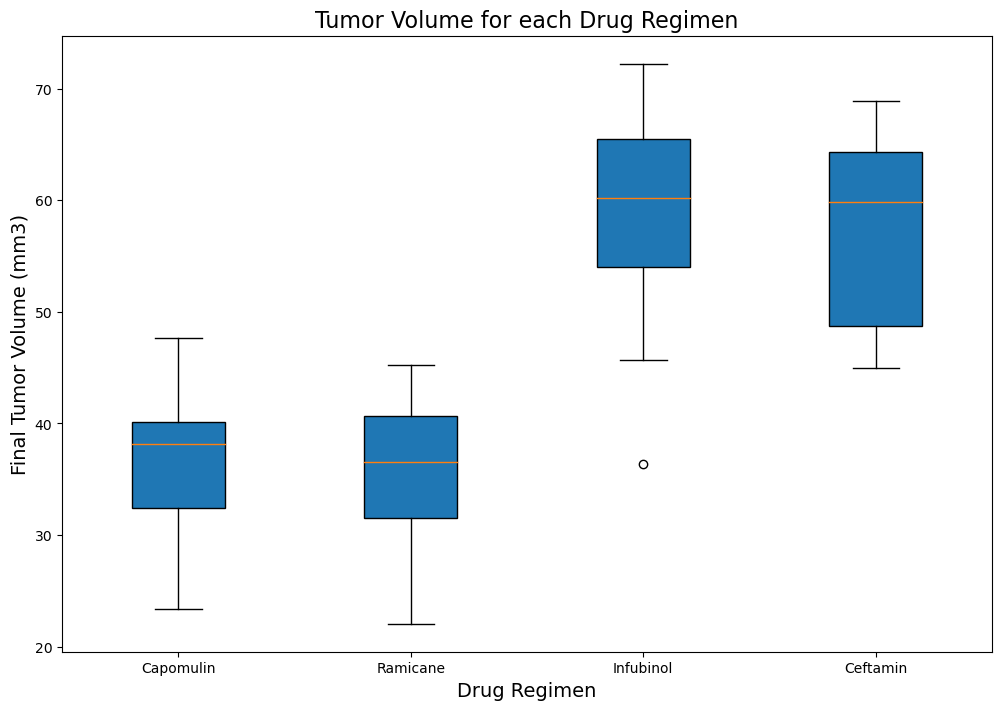

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[treatment_regimens[0]],
                drug_df[treatment_regimens[1]],
                drug_df[treatment_regimens[2]],
                drug_df[treatment_regimens[3]]
               ]
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volume for each Drug Regimen',fontsize =16)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(drug_df, labels=treatment_regimens, widths = 0.4, patch_artist=True, vert=True)

## Line and Scatter Plots
- This Sub-Section:

- Selects a mouse that was treated with Capomulin, and generates a line plot of tumor volume versus time point for that mouse.
- Generates a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

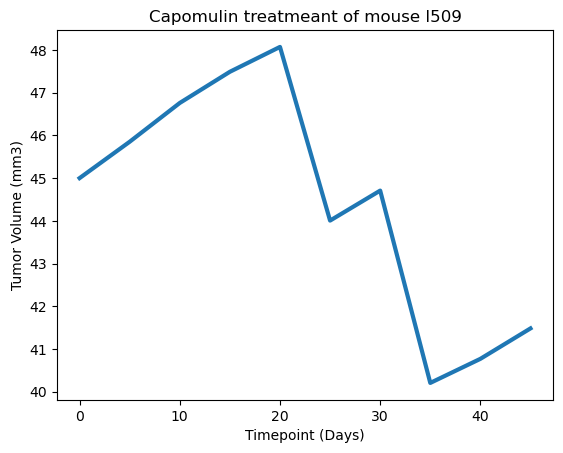

In [81]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "l509",:]
line_df
 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumsiz = line_df["Tumor Volume (mm3)"] 
x_axisTP = line_df["Timepoint"]
plt.title('Capomulin treatmeant of mouse l509') # created title
# the plot function plt.plot() with x and y values and customizations
plt.plot(x_axisTP, tumsiz, linewidth=3, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

/var/folders/y8/wd2vns792mvg7dgtj75yh5jr0000gn/T/ipykernel_986/3144043627.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capavg = cap_df.groupby(['Mouse ID']).mean()


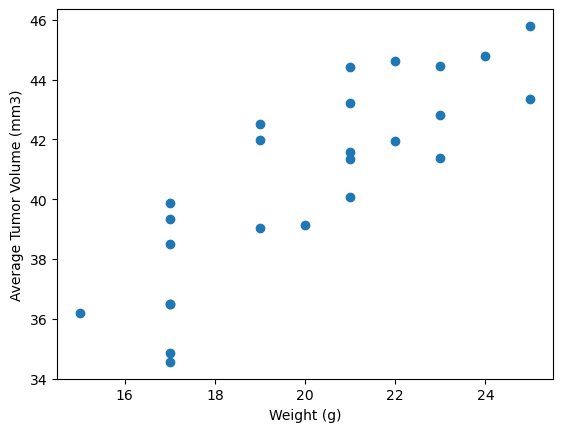

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [82]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# created dataframe using .loc() of the drug regimine Capomulin using a boolean
cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
# use groupby() and mean() to create a dataframe
capavg = cap_df.groupby(['Mouse ID']).mean()
# created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
capavg

## Correlation and Regression
- This Sub-Section:

- Calculates the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment.
- Plots the linear regression model on top of the previous scatter plot.

The correlation between mouse weight and the average tumor volume is 0.84


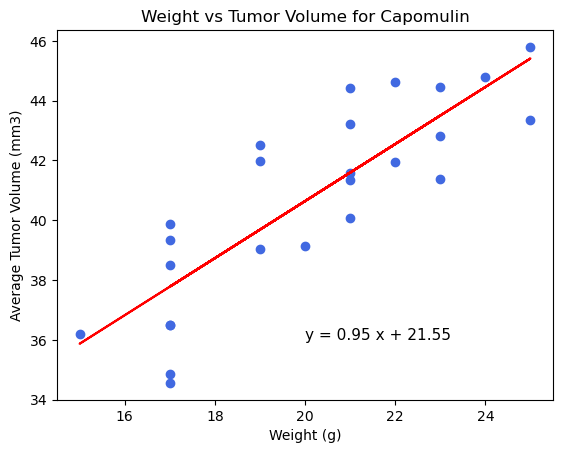

In [86]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")


(slope, intercept,rvalue, pvalue, stderr)=st.linregress(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"])
regress_values=capavg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capavg["Weight (g)"],capavg["Tumor Volume (mm3)"],color='royalblue')
plt.plot(capavg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()